In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal as sig

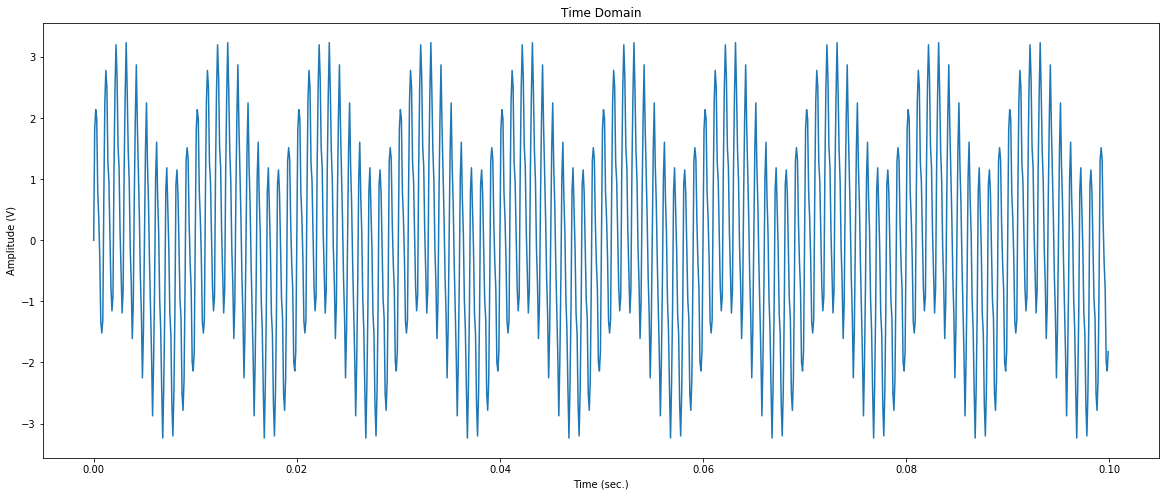

In [2]:
# Signal parameters

amp1 = 1 # V
freq1 = 100 # Hz

amp2 = 2 # V
freq2 = 1000 # Hz

amp3 = 0.5 # V
freq3 = 2000 # Hz

amp4 = 0.2 # V
freq4 = 4100 # Hz


# Sampling parameters

srate = 10000 # Hz
time  = np.arange(0, 0.1, 1/srate)
nyquist = srate/2

# Create the signal

harm1 = amp1 * np.sin( 2 * np.pi * freq1 * time)
harm2 = amp2 * np.sin( 2 * np.pi * freq2 * time)
harm3 = amp3 * np.sin( 2 * np.pi * freq3 * time)
harm4 = amp4 * np.sin( 2 * np.pi * freq4 * time)
signal = harm1 + harm2 + harm3 + harm4

plt.figure(figsize=(20,8))
plt.plot(time,signal)

plt.title('Time Domain')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (V)')
plt.show()

In [3]:
# Compute the amplitude spectrum of the signal

fft = np.abs(scipy.fftpack.fft(signal)) * 2

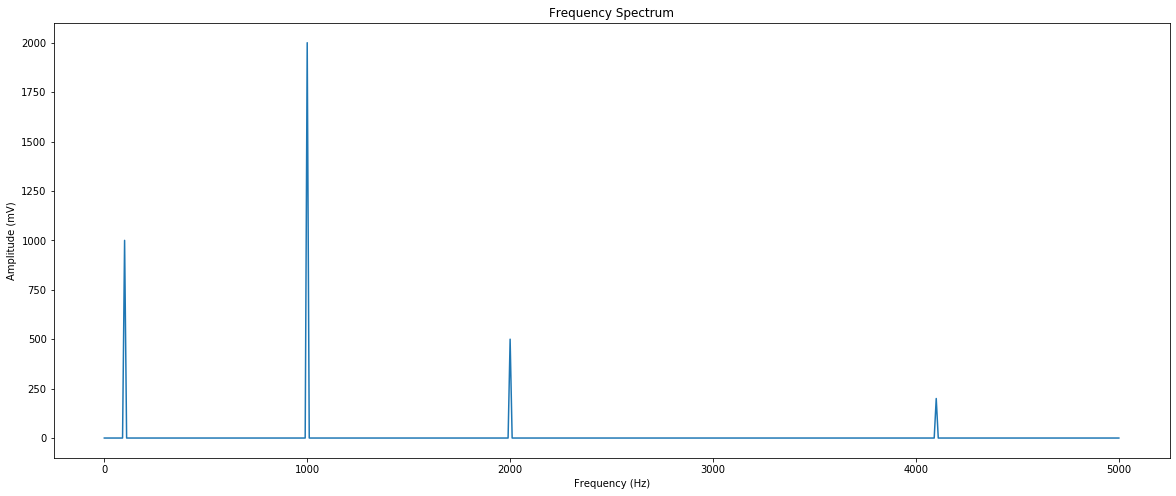

In [4]:
# Compute the frequencies vector
hz = np.linspace(0, nyquist, int(np.floor(len(signal)/2)+1) )

# Remove negative frequencies
fft = fft[0:len(hz)]

plt.figure(figsize=(20,8))
plt.plot(hz,fft)

plt.title('Frequency Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (mV)')
plt.show()

In [6]:
# Filter parameters

frange  = [800,1200] # frequency range for the band pass filter
transw  = .1 # transition width
order   = 150 # order parameter
order

150

In [7]:
# Order must be odd
if order%2==0:
    order += 1

In [8]:
# Define filter shape
shape = [ 0, 0, 1, 1, 0, 0 ]                                                                             # y axis values
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ]     # x axis values

frex

[0, 720.0, 800, 1200, 1320.0, 5000.0]

In [9]:
# Filter kernel
filtkern = scipy.signal.firls(order, frex, shape, fs=srate)
len(filtkern)

151

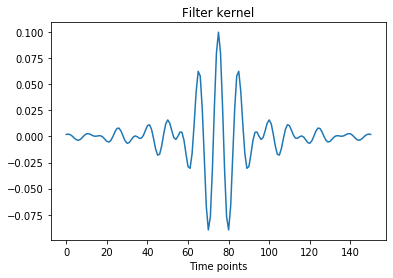

In [10]:
# Time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel')
plt.show()

In [11]:
# Compute the frequency response of the filter
filt_fft = np.abs(scipy.fftpack.fft(filtkern))

In [12]:
# Compute the frequencies vector and remove negative frequencies
hz2 = np.linspace(0, nyquist, int(np.floor(len(filtkern)/2)+1) )
filt_fft = filt_fft[0:len(hz2)]

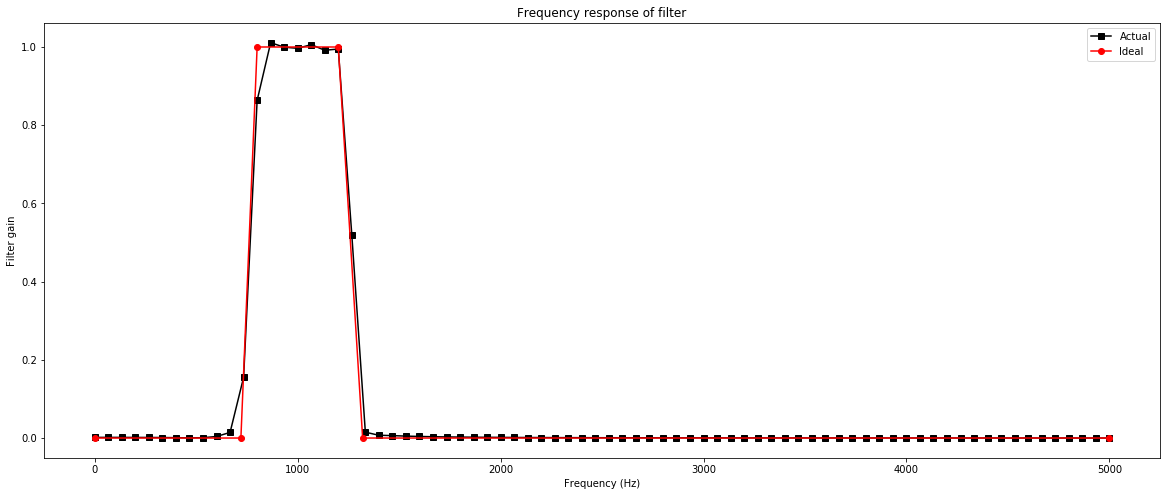

In [13]:
# Plot amplitude spectrum of the filter kernel
plt.figure(figsize=(20,8))
plt.plot(hz2, filt_fft, 'ks-', label='Actual')
plt.plot(frex, shape, 'ro-', label='Ideal')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter')
plt.show()

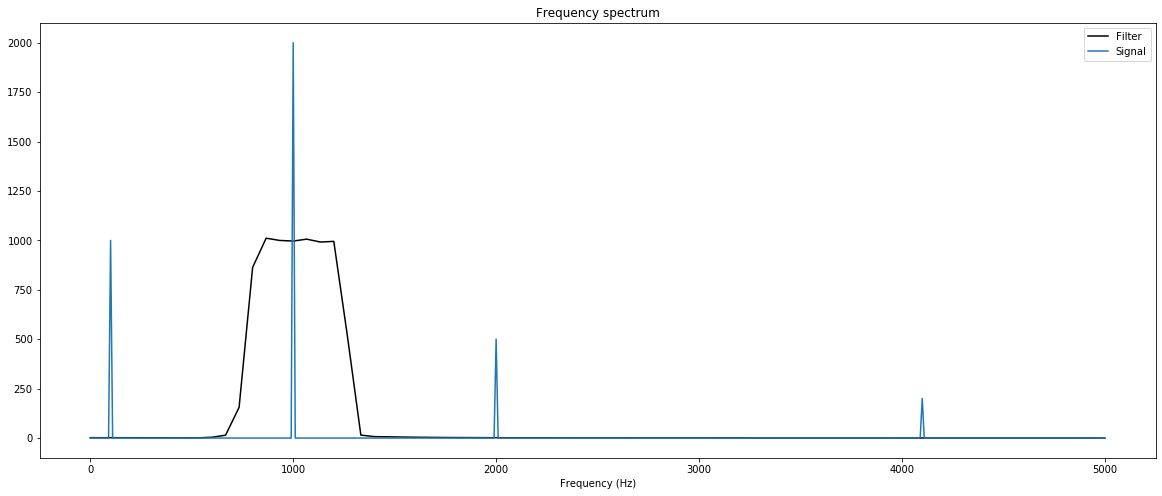

In [14]:
plt.figure(figsize=(20,8))
plt.plot(hz2, filt_fft*1000, 'k', label='Filter')
plt.plot(hz, fft, label='Signal')

plt.xlabel('Frequency (Hz)')
plt.legend()
plt.title('Frequency spectrum')
plt.show()

In [15]:
# Apply the filter
result = scipy.signal.lfilter(filtkern, [1.0], signal)

In [16]:
# Compute the spectrum for the filtered signal
fft_result = np.abs(scipy.fftpack.fft(result)) * 2
fft_result = fft_result[0:len(hz)]

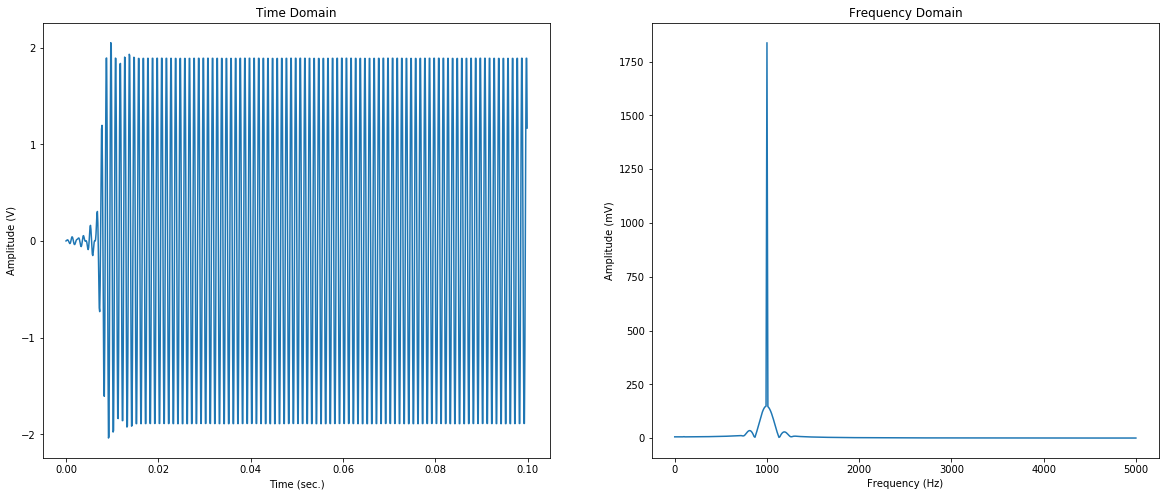

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(121)
plt.plot(time,result)
plt.title('Time Domain')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (V)')

plt.subplot(122)
plt.plot(hz,fft_result)
plt.title('Frequency Domain')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (mV)')

plt.show()
